In [53]:
get_ipython().magic(u'run visualizations.ipynb')
import sys
from hits import CyDetHits, CTHHits, CDCHits
from memory_profiler import memory_usage
from collections import Counter
sys.path.insert(0, '../modules')

Populating the interactive namespace from numpy and matplotlib


# Import Data

In [54]:
from root_numpy import root2array

data_file = "/vols/comet00/users/elg112/ICEDUST"\
            "/local_storage/SimDetectorResponse_tree"\
            "/new_sdetresp_analy/test_cth_signal_sample_analysis.root"
ice_sample = root2array(data_file, treename="COMETEventsSummary")

In [55]:
for name in ice_sample.dtype.names:
    print name

CTHHit.fModule
CTHHit.fCounter
CTHHit.fIsSc
CTHHit.fIsLG
CTHHit.fMCPos.fP.fX
CTHHit.fMCPos.fP.fY
CTHHit.fMCPos.fP.fZ
CTHHit.fMCPos.fE
CTHHit.fCharge
CTHHit.fChannel
CTHHit.fEventNumber
CTHHit.fHitNumber


CTHHit.fModule


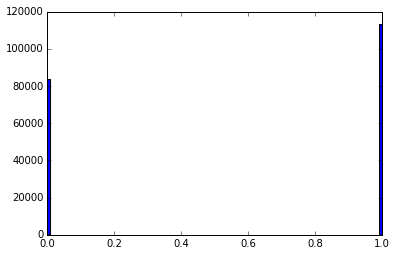

CTHHit.fCounter


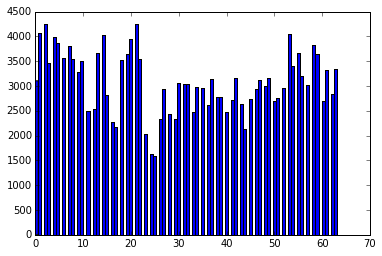

CTHHit.fIsSc


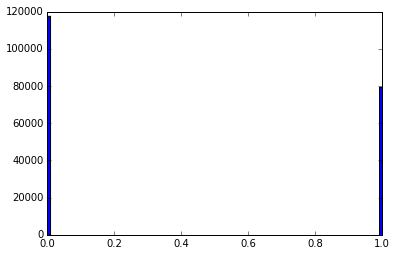

CTHHit.fIsLG


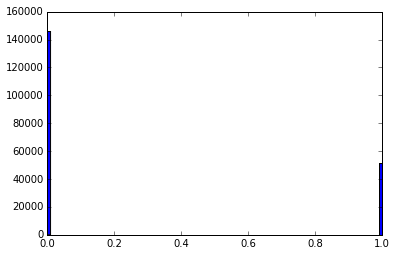

CTHHit.fMCPos.fP.fX


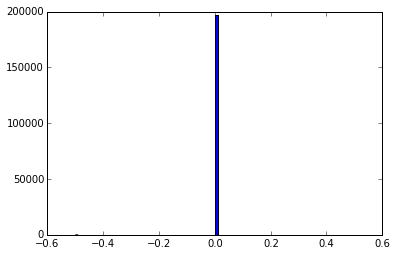

CTHHit.fMCPos.fP.fY


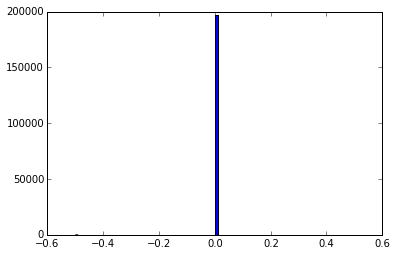

CTHHit.fMCPos.fP.fZ


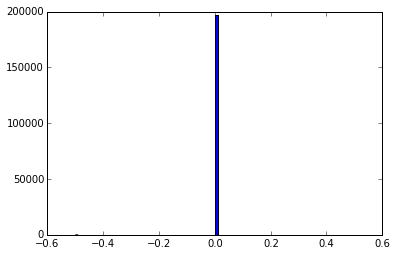

CTHHit.fMCPos.fE


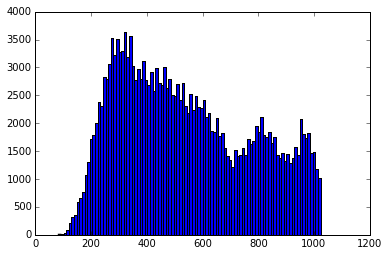

CTHHit.fCharge


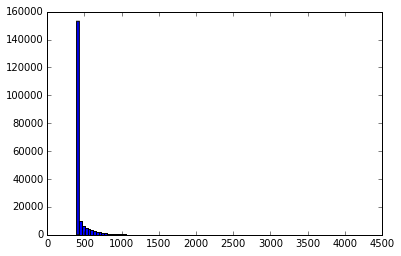

CTHHit.fChannel


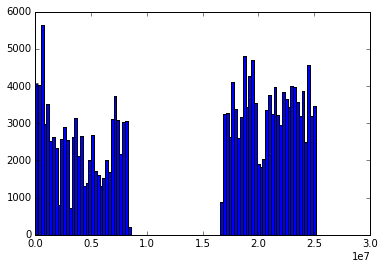

CTHHit.fEventNumber


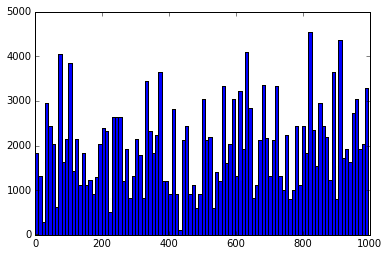

CTHHit.fHitNumber


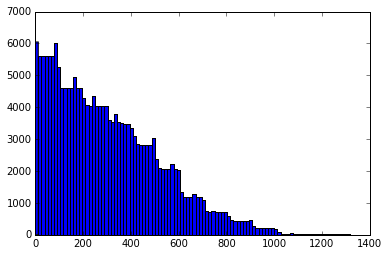

In [56]:
for name in ice_sample.dtype.names:
    print name
    plt.hist(ice_sample[name], bins=100)
    show()

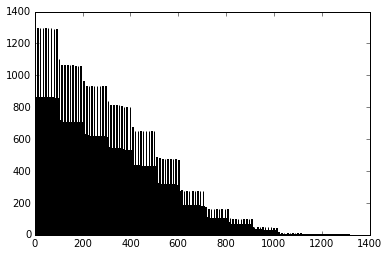

In [14]:
plt.hist(ice_sample["CTHHit.fHitNumber"], bins=600)
show()

In [15]:
print ice_sample["CTHHit.fEventNumber"]

[  0   0   0 ..., 995 995 995]


In [16]:
print np.sort(np.array(Counter(ice_sample["CTHHit.fEventNumber"]).items())[:,1])

[  75   75  101  101  101  101  101  101  101  101  101  101  101  101  101
  101  101  101  101  101  101  101  101  101  101  101  101  101  101  101
  101  101  101  101  101  101  101  101  101  101  101  101  101  101  101
  101  101  101  101  101  101  101  101  101  101  101  101  101  101  101
  101  101  103  103  103  103  103  103  104  104  104  104  104  106  106
  108  110  113  170  202  202  202  202  202  202  202  202  202  202  202
  202  202  202  202  202  202  202  202  202  202  202  204  204  204  204
  204  204  204  205  205  205  205  206  206  207  207  208  208  209  213
  223  297  297  298  303  303  303  303  303  303  303  303  303  303  303
  303  303  303  303  305  305  305  305  305  305  305  305  305  305  305
  306  306  307  307  308  308  309  312  312  312  314  357  371  371  371
  404  404  404  404  404  404  404  404  404  404  404  404  404  404  404
  404  404  404  404  404  404  404  404  404  404  406  406  406  406  406
  406  406  

In [17]:
del ice_sample

In [18]:
import hits

In [19]:
reload(hits)

<module 'hits' from '../modules/hits.pyc'>

In [20]:
from hits import FlatHits

In [46]:
ice_flat = FlatHits(path=data_file, 
                    tree="COMETEventsSummary", 
                    prefix="CTHHit.f", 
                    key_name="EventNumber",
                    hit_type_name="MCPos.fP.fX",
                    signal_coding=[0],
                    branches=["Charge", 
                              "Channel", 
                              "HitNumber", 
                              "MCPos.fE",
                              "IsSc",
                              "IsLG",
                              "Counter",
                              "Module"],
                    use_evt_idx=True)

In [47]:
print ice_flat.all_branches
print ice_flat.n_events
print ice_flat.n_hits
print ice_flat.event_to_n_hits
print ice_flat.hits_to_events
print ice_flat.event_to_hits

['CTHHit.fCharge', 'CTHHit.fChannel', 'CTHHit.fHitNumber', 'CTHHit.fMCPos.fE', 'CTHHit.fIsSc', 'CTHHit.fIsLG', 'CTHHit.fCounter', 'CTHHit.fModule', 'CTHHit.fMCPos.fP.fX', 'CTHHit.fEventNumber', 'CTHHit.fhits_index', 'CTHHit.fevent_index']
432
197031
[ 709  303  101  707  305  312  710  297  606  101  718  810  608  101  606
  101  404  406  303  611  305  707  406  507  101  614  404  505  610  202
  909  305  303  810  710  101  307  508  709  911  412  103  606  707  707
  305  406  608  505  909  103  104  308  101  608  202  709  309  206  505
  608  709  608  303  209  608  101  101  213  101  810  412  202  202  507
  505  101  609   75  915  610  505  812  404  204  608  371  707 1014  606
  507  505  507  808  814  606  202  608  505  711  811  505  606  608  101
  810  404  101  406  911  103  408  101  113  608  404  912  303  223  606
  110  404  101  406  371  104  707  606  413  202  101  101  406  505  609
  202 1014  711  505  707  101  917  101  101 1020  101  609  404 

In [48]:
import pandas

In [49]:
iced_df = pandas.DataFrame(ice_flat.data)
iced_df

,CTHHit.fCharge,CTHHit.fChannel,CTHHit.fHitNumber,CTHHit.fMCPos.fE,CTHHit.fIsSc,CTHHit.fIsLG,CTHHit.fCounter,CTHHit.fModule,CTHHit.fMCPos.fP.fX,CTHHit.fEventNumber,CTHHit.fhits_index,CTHHit.fevent_index
0,401,688128,0,236,False,True,5,0,0,0,0,0
1,400,688128,1,237,False,True,5,0,0,0,1,0
2,400,688128,2,238,False,True,5,0,0,0,2,0
3,400,688128,3,239,False,True,5,0,0,0,3,0
4,400,688128,4,240,False,True,5,0,0,0,4,0
5,400,688128,5,241,False,True,5,0,0,0,5,0
6,399,688128,6,242,False,True,5,0,0,0,6,0
7,400,688128,7,243,False,True,5,0,0,0,7,0
8,399,688128,8,244,False,True,5,0,0,0,8,0
9,401,688128,9,245,False,True,5,0,0,0,9,0


In [50]:
del iced_df

0
IsSc [False]
IsLG [ True]
Counter [5]
Module [0]


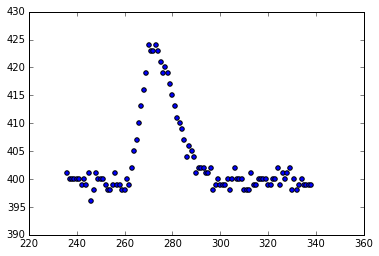

IsSc [ True]
IsLG [False]
Counter [49]
Module [0]


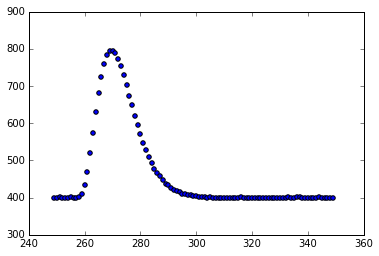

IsSc [ True]
IsLG [False]
Counter [50]
Module [0]


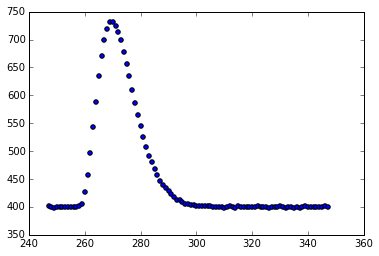

IsSc [False]
IsLG [False]
Counter [51]
Module [0]


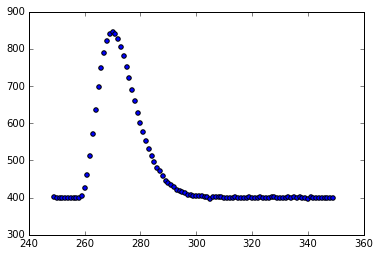

IsSc [ True]
IsLG [False]
Counter [51]
Module [0]


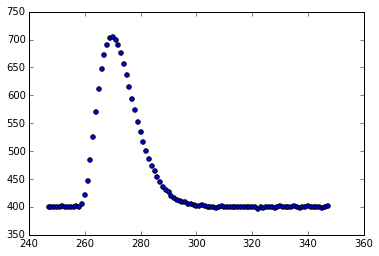

IsSc [False]
IsLG [ True]
Counter [52]
Module [0]


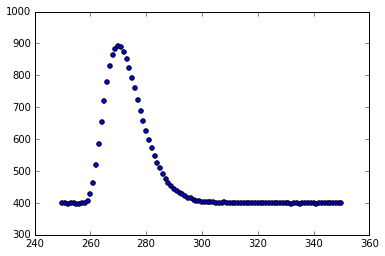

IsSc [False]
IsLG [ True]
Counter [53]
Module [0]


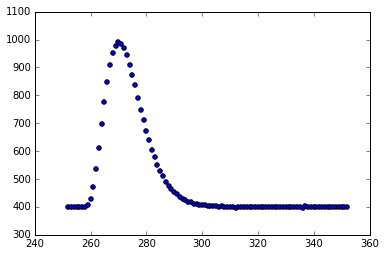

1
IsSc [False]
IsLG [False]
Counter [5]
Module [0]


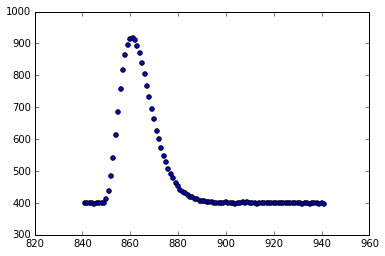

IsSc [False]
IsLG [False]
Counter [6]
Module [0]


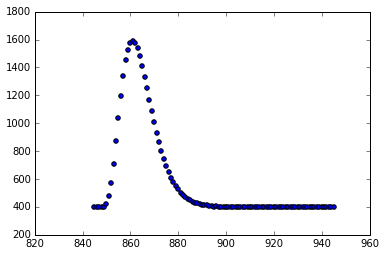

IsSc [ True]
IsLG [False]
Counter [8]
Module [0]


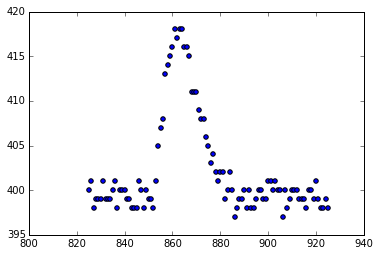

2
IsSc [False]
IsLG [ True]
Counter [15]
Module [0]


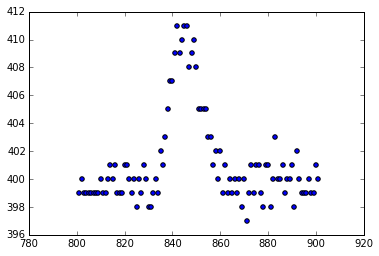

3
IsSc [False]
IsLG [False]
Counter [49]
Module [1]


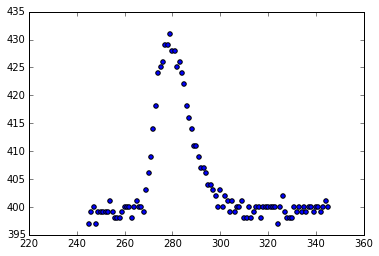

IsSc [False]
IsLG [False]
Counter [50]
Module [1]


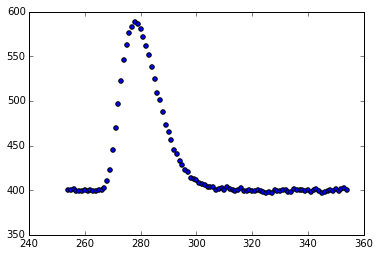

IsSc [False]
IsLG [False]
Counter [51]
Module [1]


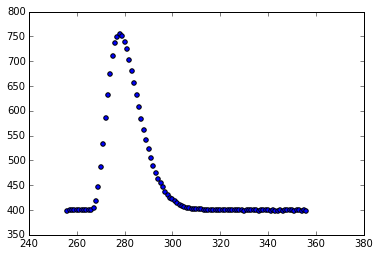

IsSc [ True]
IsLG [False]
Counter [51]
Module [1]


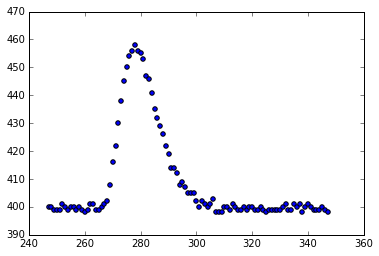

IsSc [False]
IsLG [False]
Counter [52]
Module [1]


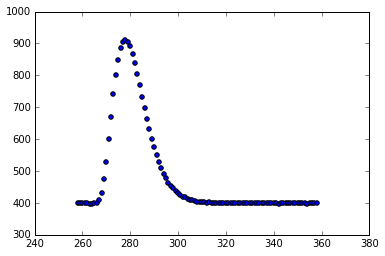

IsSc [ True]
IsLG [False]
Counter [52]
Module [1]


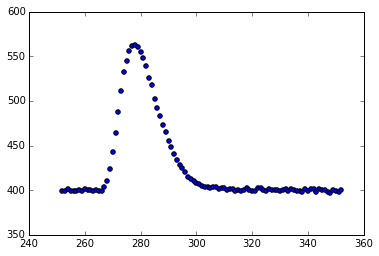

IsSc [ True]
IsLG [False]
Counter [53]
Module [1]


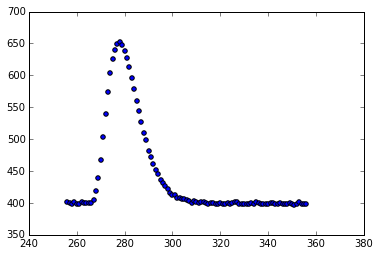

4
IsSc [False]
IsLG [False]
Counter [46]
Module [0]


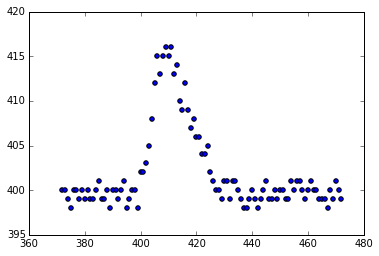

IsSc [False]
IsLG [False]
Counter [47]
Module [0]


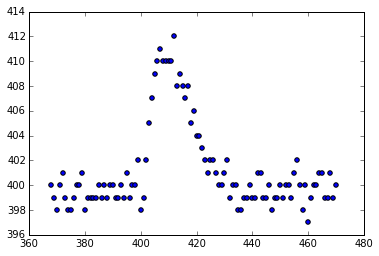

IsSc [False]
IsLG [False]
Counter [50]
Module [0]


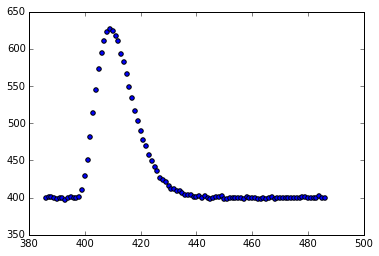

5
IsSc [ True]
IsLG [False]
Counter [0]
Module [1]


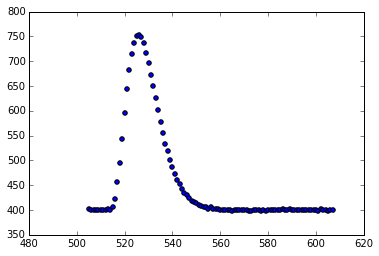

IsSc [ True]
IsLG [False]
Counter [2]
Module [1]


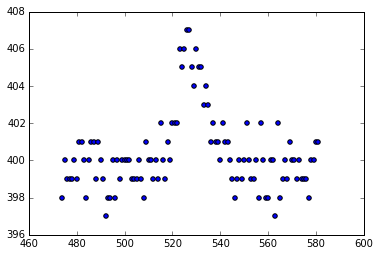

IsSc [ True]
IsLG [False]
Counter [4]
Module [1]


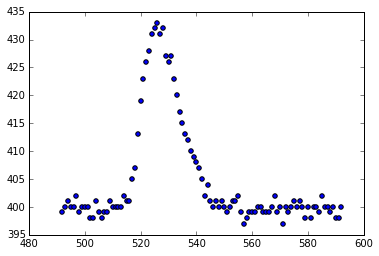

6
IsSc [False]
IsLG [False]
Counter [36]
Module [0]


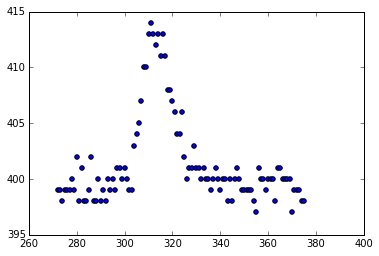

IsSc [False]
IsLG [ True]
Counter [49]
Module [0]


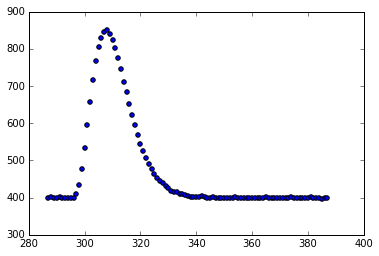

IsSc [ True]
IsLG [ True]
Counter [49]
Module [0]


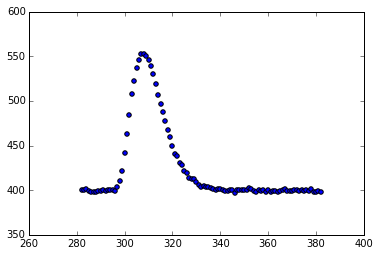

IsSc [False]
IsLG [ True]
Counter [50]
Module [0]


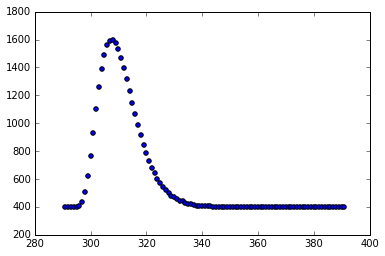

IsSc [ True]
IsLG [ True]
Counter [50]
Module [0]


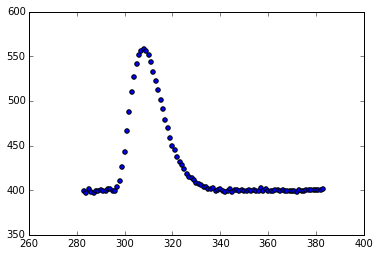

IsSc [ True]
IsLG [ True]
Counter [52]
Module [0]


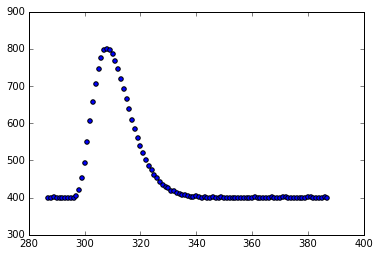

IsSc [False]
IsLG [False]
Counter [53]
Module [0]


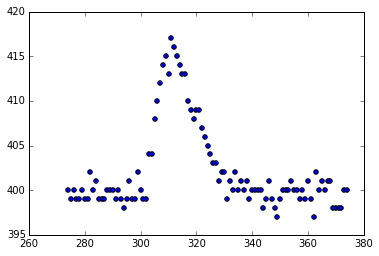

7
IsSc [False]
IsLG [False]
Counter [16]
Module [1]


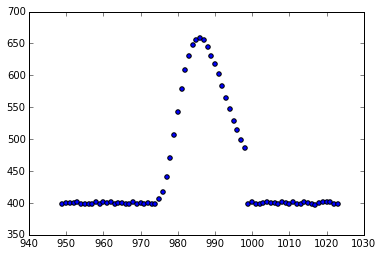

IsSc [False]
IsLG [False]
Counter [17]
Module [1]


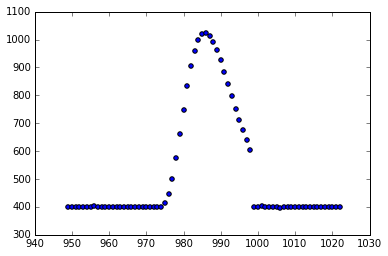

IsSc [ True]
IsLG [False]
Counter [17]
Module [1]


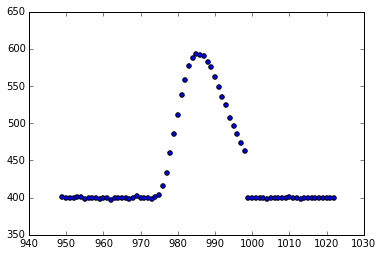

IsSc [ True]
IsLG [False]
Counter [18]
Module [1]


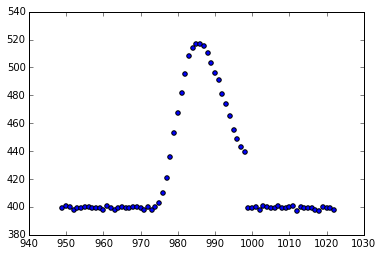

8
IsSc [False]
IsLG [ True]
Counter [57]
Module [1]


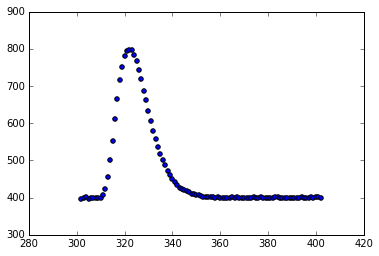

IsSc [False]
IsLG [ True]
Counter [58]
Module [1]


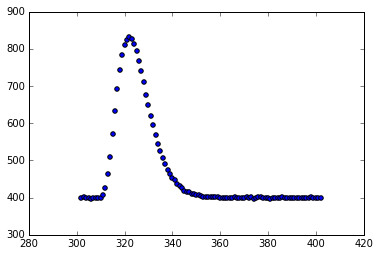

IsSc [ True]
IsLG [ True]
Counter [58]
Module [1]


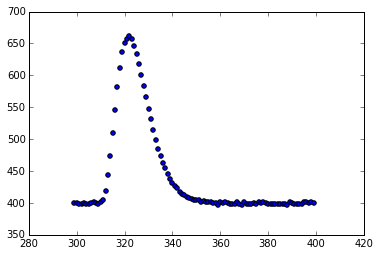

IsSc [False]
IsLG [ True]
Counter [59]
Module [1]


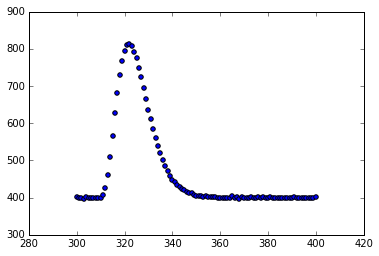

IsSc [ True]
IsLG [ True]
Counter [59]
Module [1]


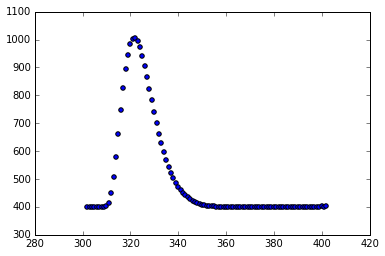

IsSc [ True]
IsLG [ True]
Counter [60]
Module [1]


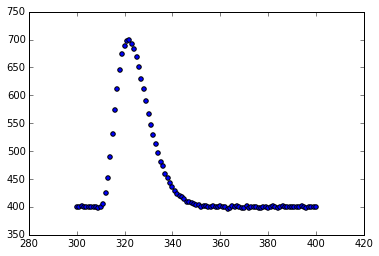

9
IsSc [False]
IsLG [False]
Counter [63]
Module [0]


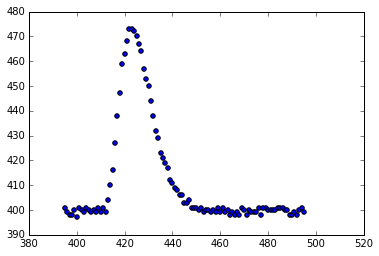

In [52]:
# Look at the digits
chan_name = "CTHHit.fChannel"
for event in np.unique(ice_flat.hits_to_events)[:10]:
    print event
    event_hits = ice_flat.get_events(events=event)
    channels = np.unique(event_hits[chan_name])
    for chan in channels:
        chan_hits = ice_flat.filter_hits(event_hits, chan_name, values=chan)
        plt.scatter(chan_hits["CTHHit.fMCPos.fE"],chan_hits["CTHHit.fCharge"])
        print "IsSc {}".format(np.unique(chan_hits["CTHHit.fIsSc"]))
        print "IsLG {}".format(np.unique(chan_hits["CTHHit.fIsLG"]))
        print "Counter {}".format(np.unique(chan_hits["CTHHit.fCounter"]))
        print "Module {}".format(np.unique(chan_hits["CTHHit.fModule"]))
        plt.show()

In [79]:
# Look at the digits
chan_name = "CTHHit.fChannel"
max_charge = []
min_time = []
for event in np.unique(ice_flat.hits_to_events)[:]:
    event_hits = ice_flat.get_events(events=event)
    event_hits = ice_flat.filter_hits(event_hits, "CTHHit.fIsSc", values=[True])
    if len(event_hits) != 0:
        max_charge.append(np.amax(event_hits["CTHHit.fCharge"]))
        min_time.append(np.amin(event_hits["CTHHit.fMCPos.fE"]))

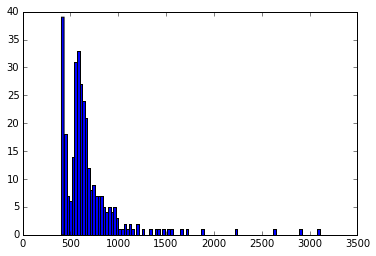

In [80]:
plt.hist(max_charge, bins=100)
plt.show()

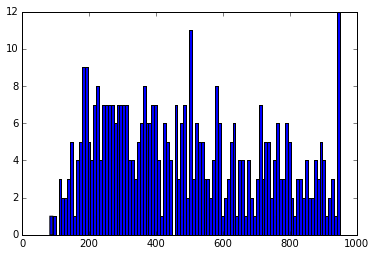

In [64]:
plt.hist(min_time, bins=100)
plt.show()